# Линейная регрессия

На сегодняшнем занятии будем работать с датасетом BlackFriday (ниже есть его описание):

Description
The dataset here is a sample of the transactions made in a retail store. The store wants to know better the customer purchase behaviour against different products. Specifically, here the problem is a regression problem where we are trying to predict the dependent variable (the amount of purchase) with the help of the information contained in the other variables.

Classification problem can also be settled in this dataset since several variables are categorical, and some other approaches could be "Predicting the age of the consumer" or even "Predict the category of goods bought". This dataset is also particularly convenient for clustering and maybe find different clusters of consumers within it.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('BlackFriday.csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Подготовка данных

In [3]:
missing_values = data.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0] / data.shape[0]
print(f'{missing_values * 100} %')

Product_Category_3    69.441029
Product_Category_2    31.062713
dtype: float64 %


Скорее всего NaN-ы в Product_Category_2 и Product_Category_3 означают, что человек не покупал продукты из этих категорий.

Поэтому можем заменить эти пропущенные значения на 0.

In [4]:
data = data.fillna(0)

In [5]:
missing_values = data.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0] / data.shape[0]
print(f'{missing_values *100} %')

Series([], dtype: float64) %


Посмотрим, какие типы данных есть в нашем датасете. 

Выведите на экран тип каждой колонки в таблице.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          537577 non-null  float64
 10  Product_Category_3          537577 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


Обработаем нечисловые колонки.

1) Выведите на экран все возможные значения из столбца Gender.

2) Замените значение 'M' на 1, а 'F' на 0.

In [7]:
print(data['Gender'].unique())

data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'M' else 0)

['F' 'M']


Поработаем со столбцом Age.

1) Выведите на экран все возможные значения из столбца Age.

2) Напишите функцию для перевода каждого диапазона возрастов в число (самые маленькие возрасты - 0, следующий диапазон - 1 и т.д.). Замените значения в столбце Age на числовые, применив эту функцию.

In [8]:
#your code here

print(data['Age'].unique())

age_mapping_dict = {
    '0-17': 0,
    '18-25': 1,
    '26-35': 2,
    '36-45': 3,
    '46-50': 4,
    '51-55': 5,
    '55+': 6,
}

def map_age(age):
    return age_mapping_dict[age]

data['Age'] = data['Age'].apply(map_age)

['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']


Обработаем столбец City_Category.

1) Выведите все уникальные значения данного столбца.

2) Закодируйте столбец с помощью OneHotEncoding (get_dummies).

In [9]:
print(data['City_Category'].unique())

data = pd.get_dummies(data, columns=['City_Category'], drop_first=True, dtype = int)
data

['A' 'C' 'B']


,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_B,City_Category_C
0,1000001,P00069042,0,0,10,2,0,3,0.0,0.0,8370,0,0
1,1000001,P00248942,0,0,10,2,0,1,6.0,14.0,15200,0,0
2,1000001,P00087842,0,0,10,2,0,12,0.0,0.0,1422,0,0
3,1000001,P00085442,0,0,10,2,0,12,14.0,0.0,1057,0,0
4,1000002,P00285442,1,6,16,4+,0,8,0.0,0.0,7969,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,1,3,16,1,0,1,2.0,0.0,11664,0,1
537573,1004737,P00111142,1,3,16,1,0,1,15.0,16.0,19196,0,1
537574,1004737,P00345942,1,3,16,1,0,8,15.0,0.0,8043,0,1
537575,1004737,P00285842,1,3,16,1,0,5,0.0,0.0,7172,0,1


Наконец, обработаем Stay_In_Current_City_Years.

1) Выведите на экран все уникальные значения данного столбца.

2) Замените '4+' на 4, а все остальные значения оставьте как есть, но переведите их в числовой вид (x -> int(x)).

In [10]:
#your code here

def map_stay(stay):
    if stay == '4+':
        return 4
    else:
        return int(stay)

data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].apply(map_stay)    

In [11]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_B,City_Category_C
0,1000001,P00069042,0,0,10,2,0,3,0.0,0.0,8370,0,0
1,1000001,P00248942,0,0,10,2,0,1,6.0,14.0,15200,0,0
2,1000001,P00087842,0,0,10,2,0,12,0.0,0.0,1422,0,0
3,1000001,P00085442,0,0,10,2,0,12,14.0,0.0,1057,0,0
4,1000002,P00285442,1,6,16,4,0,8,0.0,0.0,7969,0,1


Удалим столбцы User_ID и Product_ID.

In [12]:
#your code here

cols = ['User_ID','Product_ID']
data.drop(cols, inplace=True, axis =1)

# Исследование данных

1. Как влияет пол на целевую переменную Purchase? Постройте диаграмму.

2. Как влияет возраст на целевую переменную Purchase? Постройте диаграмму.

3. Как влияет City_Category на целевую переменную Purchase? Постройте диаграмму.

Нарисуйте матрицу корреляций признаков.

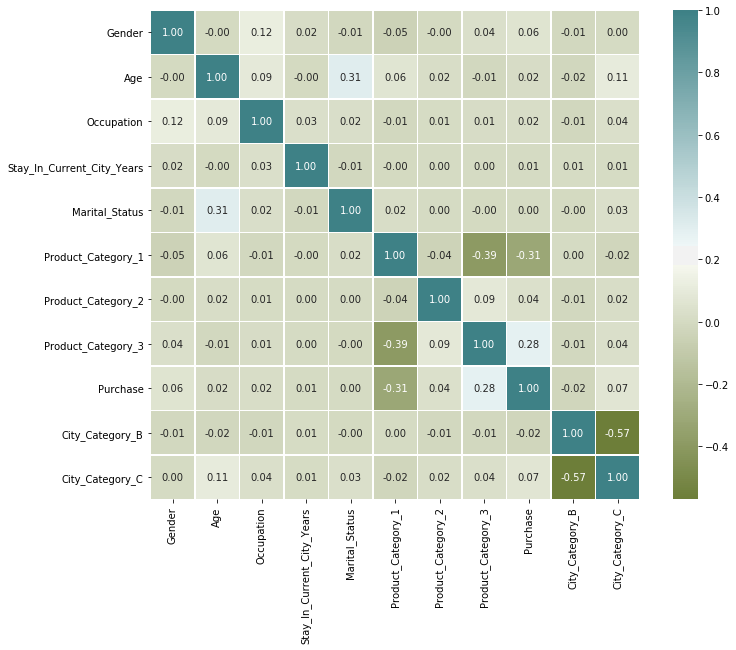

In [13]:
plt.figure(figsize=(12,9))

corr = data.corr()
sns.heatmap(corr, annot=True, linewidths=.5, fmt= '.2f', mask=np.zeros_like(corr, dtype=np.bool), \
            cmap=sns.diverging_palette(100,200, as_cmap=True), square=True)

# Построение модели

In [14]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

X = data.copy()

y = data['Purchase']
del X['Purchase']

X['Product'] = X['Product_Category_1'] * X['Product_Category_3']

ind_train, ind_test = train_test_split(range(len(X)), test_size=0.2, random_state=111)
X_train = X.iloc[ind_train]
y_train = y[ind_train]
X_test = X.iloc[ind_test]
y_test = y[ind_test]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
print(y_pred)

[11965.7012279   7656.11286483  8525.50440259 ...  7330.07656614
  9957.58221028  9093.62375548]


In [15]:
print(r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred))

0.13494723413739185 21524684.495717593


Добавим L1 регуляризацию.

In [16]:
from sklearn.linear_model import Lasso

for a in np.arange(0.1, 100.1, 25):
    regressor2 = Lasso(alpha=a)
    regressor2.fit(X_train, y_train)

    y_pred2 = regressor2.predict(X_test)

    print('alpha={}'.format(a))
    print('Scores:', r2_score(y_test,y_pred2), mean_squared_error(y_test, y_pred2))
    print(regressor2.coef_,'\n')

alpha=0.1
Scores: 0.13494727374222637 21524683.510249883
[  209.79057742   134.69878377    38.76884216    13.87708511
   -21.18178276 -1194.03856657    52.23899218   925.9970247
    70.71900358   311.23180496] 

alpha=25.1
Scores: 0.1347137637397442 21530493.825329345
[  188.22565368   108.72270497    20.09589568     0.
    -0.         -1176.46511481    30.54216468   912.15059708
    14.58518785   258.3675509 ] 

alpha=50.1
Scores: 0.13429106221630294 21541011.700408168
[ 1.66628597e+02  8.75700742e+01  8.55532291e-01  0.00000000e+00
 -0.00000000e+00 -1.15841517e+03  8.60093993e+00  8.97917620e+02
  0.00000000e+00  2.29397497e+02] 

alpha=75.1
Scores: 0.1337612278520044 21554195.309520315
[  143.05695947    63.81635889     0.             0.
     0.         -1139.95214537     0.           882.31287341
     0.           208.18754192] 



**Видим, что L1-регуляризация зануляет некоторые веса и таким образом производит отбор признаков.**

Подберем оптимальное значение параметра регуляризации по кросс-валидации

In [17]:
from sklearn.linear_model import LassoCV

n_alphas = 200
alphas = np.linspace(0.1, 10, n_alphas)

lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso_cv.fit(X, y)

LassoCV(alphas=array([ 0.1       ,  0.14974874,  0.19949749,  0.24924623,  0.29899497,
        0.34874372,  0.39849246,  0.44824121,  0.49798995,  0.54773869,
        0.59748744,  0.64723618,  0.69698492,  0.74673367,  0.79648241,
        0.84623116,  0.8959799 ,  0.94572864,  0.99547739,  1.04522613,
        1.09497487,  1.14472362,  1.19447236,  1.24422111,  1.29396985,
        1.34371859,  1.39346734,  1.44321608,  1.49296482,  1.54271357,
        1.5924...
        9.30351759,  9.35326633,  9.40301508,  9.45276382,  9.50251256,
        9.55226131,  9.60201005,  9.65175879,  9.70150754,  9.75125628,
        9.80100503,  9.85075377,  9.90050251,  9.95025126, 10.        ]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=42, selection='cyclic', tol=0.0001,
        verbose=False)

In [18]:
lasso_cv.coef_

array([ 482.16976974,  103.49903741,    5.69793977,    9.52760257,
        -47.30585129, -317.88884738,    8.13663821,  148.34973621,
        145.94388277,  660.99699949])

In [19]:
lasso_cv.alpha_

0.1

In [20]:
regressor2 = Lasso(alpha=lasso_cv.alpha_)

regressor2.fit(X_train, y_train)

y_pred2 = regressor2.predict(X_test)

print('Scores:', r2_score(y_test, y_pred2), mean_squared_error(y_test, y_pred2))

Scores: 0.13494727374222637 21524683.510249883


Добавим L2 регуляризацию.

In [21]:
from sklearn.linear_model import Ridge

for a in np.arange(-10, 10.1, 2.5):
    regressor3 = Ridge(alpha=a)
    regressor3.fit(X_train, y_train)

    y_pred3 = regressor3.predict(X_test)

    print('alpha={}'.format(a))
    print('Scores:',r2_score(y_test, y_pred3), mean_squared_error(y_test, y_pred3))
    print(regressor3.coef_)

alpha=-10.0
Scores: 0.13494723761220817 21524684.409255438
[  209.87944783   134.82546587    38.84199631    13.96728677
   -21.32682107 -1194.13179636    52.32433086   926.06457378
    70.95172149   311.45361575]
alpha=-7.5
Scores: 0.13494723675116538 21524684.430680342
[  209.87858039   134.82440742    38.84210403    13.96727861
   -21.32641984 -1194.12608113    52.32460719   926.06149056
    70.94977898   311.45102683]
alpha=-5.0
Scores: 0.13494723588501512 21524684.45223234
[  209.87771296   134.82334899    38.84221176    13.96727046
   -21.32601861 -1194.12036596    52.32488352   926.05840735
    70.94783653   311.44843797]
alpha=-2.5
Scores: 0.13494723501375694 21524684.473911427
[  209.87684554   134.82229057    38.84231947    13.9672623
   -21.32561739 -1194.11465086    52.32515984   926.05532415
    70.94589414   311.44584918]
alpha=0.0
Scores: 0.13494723413739185 21524684.495717593
[  209.87597813   134.82123217    38.84242718    13.96725414
   -21.32521618 -1194.10893582    5

**Ridge регрессия не зануляет веса (они могут быть очень маленькими, но ненулевыми).**

Теперь подберем оптимальное a по кросс-валидации.

In [22]:
from sklearn.linear_model import RidgeCV

n_alphas = 20
ridge_alphas = np.logspace(-2, 6, n_alphas)

ridge_cv = RidgeCV(
    alphas=ridge_alphas, 
    scoring='neg_mean_squared_error',
    cv=5,
)
ridge_cv.fit(X, y)

RidgeCV(alphas=array([1.00000000e-02, 2.63665090e-02, 6.95192796e-02, 1.83298071e-01,
       4.83293024e-01, 1.27427499e+00, 3.35981829e+00, 8.85866790e+00,
       2.33572147e+01, 6.15848211e+01, 1.62377674e+02, 4.28133240e+02,
       1.12883789e+03, 2.97635144e+03, 7.84759970e+03, 2.06913808e+04,
       5.45559478e+04, 1.43844989e+05, 3.79269019e+05, 1.00000000e+06]),
        cv=5, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [23]:
ridge_cv.alpha_

61.584821106602604

In [24]:
regressor3 = Lasso(alpha=ridge_cv.alpha_)

regressor3.fit(X_train, y_train)

y_pred3 = regressor3.predict(X_test)

print('Scores:', r2_score(y_test, y_pred3), mean_squared_error(y_test, y_pred3))

Scores: 0.13405790882648072 21546813.14206939


Добавим одновременно и L1, и L2 регуляризацию.

У ElasticNet два параметра: alpha и l1_ratio.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

In [25]:
from sklearn.linear_model import ElasticNet

#your code here

regressor4 = ElasticNet(alpha=0.1, l1_ratio=0.3)
regressor4.fit(X_train, y_train)

y_pred4 = regressor4.predict(X_test)

print(r2_score(y_test, y_pred4), mean_squared_error(y_test, y_pred4))

0.134606473037022 21533163.487362176


Посмотрим на веса, которые присвоила линейная регрессия признакам.

In [26]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regressor.coef_))], axis = 1)
coefficients

,0,0
0,Gender,209.875978
1,Age,134.821232
2,Occupation,38.842427
3,Stay_In_Current_City_Years,13.967254
4,Marital_Status,-21.325216
5,Product_Category_1,-1194.108936
6,Product_Category_2,52.325436
7,Product_Category_3,926.052241
8,City_Category_B,70.943952
9,City_Category_C,311.443260


# Feature Ingineering

Попробуйте соорудить новые признаки.

Идеи:

1) Группировка исходных признаков по бинам
(попробуйте сгруппировать числовые признаки, например, Product_Category_1(2,3))

2) Перемножение признаков, которые в паре могут влиять на результат (линейная регрессия не умеет умножать)

3) Взятие других функций от признаков.

4) Счётчики.

In [27]:
def code_mean(data, cat_feature, real_feature):
    """
    Возвращает словарь, где ключами являются уникальные категории признака cat_feature, 
    а значениями - средние по real_feature
    """
    return dict(data.groupby(cat_feature)[real_feature].mean())

In [28]:
data['age_average'] = list(map(code_mean(data.iloc[ind_train], 'Age', "Purchase").get, data.Age))